#### Analisis Jalur / Path Analysis -- Gangga Anuraga 

1. Download Anaconda https://www.anaconda.com/distribution/
2. Setelah ter-install buka anaconda dan pilih environments kemudian create nama project misal "SEM" dan pilih R
3. Kemudian jalankan dengan open jupyter notebook pada environment

![image](https://user-images.githubusercontent.com/63955664/79885718-9cf04280-8421-11ea-884c-fcf819295a89.png)

materi path analysis dapat di download di https://drive.google.com/file/d/1z1y9Ky1N_Yc84TxpHYZl5698LBi7PsIu/view

In [1]:
# library yang digunakan
library("sem")

In [2]:
# matrik korelasi, didapatkan dari korelasi antar variabel terukur
R.sci <- readMoments(diag=FALSE, names=c("read","write","math","science"),
                     text="
                     0.5967765 
                     0.6622801 0.6174493 
                     0.6301579 0.5704416 0.6307332 
                     ")
R.sci

,read,write,math,science
read,1.0000000,0.0000000,0.0000000,0
write,0.5967765,1.0000000,0.0000000,0
math,0.6622801,0.6174493,1.0000000,0
science,0.6301579,0.5704416,0.6307332,1


In [3]:
# Tentukan Spesifikasi Model
mod.sci <- specifyModel(text="
                        read -> math,gam31
                        write -> math,gam32
                        read -> science,gam41
                        write -> science, gam42
                        math -> science, beta43
                        math <-> math, phi33
                        science <-> science, phi44    
                        ")    
mod.sci

NOTE: it is generally simpler to use specifyEquations() or cfa()
      see ?specifyEquations



  Path                Parameter
1 read -> math        gam31    
2 write -> math       gam32    
3 read -> science     gam41    
4 write -> science    gam42    
5 math -> science     beta43   
6 math <-> math       phi33    
7 science <-> science phi44    

In [4]:
help(specifyModel)

In [5]:
sem.out <- sem(mod.sci, R.sci, N=200,fixed.x=c("read","write"), standardized=TRUE)
effects(sem.out)
summary(sem.out)


 Total Effects (column on row)
             read     write      math
math    0.4563133 0.3451323 0.0000000
science 0.4499934 0.3018961 0.3018541

 Direct Effects
             read     write      math
math    0.4563133 0.3451323 0.0000000
science 0.3122534 0.1977165 0.3018541

 Indirect Effects
           read     write math
math    0.00000 0.0000000    0
science 0.13774 0.1041796    0


 Model Chisquare =  0   Df =  0 Pr(>Chisq) = NA
 AIC =  14
 BIC =  0

 Normalized Residuals
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.000e+00 0.000e+00 1.216e-15 9.855e-16 1.360e-15 2.650e-15 

 R-square for Endogenous Variables
   math science 
 0.5153  0.4999 

 Parameter Estimates
       Estimate  Std Error  z value  Pr(>|z|)                         
gam31  0.4563133 0.06150508 7.419115 1.179056e-13 math <--- read      
gam32  0.3451323 0.06150508 5.611443 2.006466e-08 math <--- write     
gam41  0.3122534 0.07058543 4.423765 9.699548e-06 science <--- read   
gam42  0.1977165 0.06723349 2.940745 3.274241e-03 science <--- write  
beta43 0.3018541 0.07200294 4.192246 2.762058e-05 science <--- math   
phi33  0.4846911 0.04859074 9.974969 1.961633e-23 math <--> math      
phi44  0.5000559 0.05013108 9.974969 1.961633e-23 science <--> science

 Iterations =  0 

In [6]:
# Diagram Jalur / Path Diagram
library(devtools)
dev_mode()

Loading required package: usethis

Warning message:
"C:/Users/Anuraga/Documents/R-dev does not appear to be a library. Are sure you specified the correct directory?"
Dev mode: ON



In [7]:
library(semPlot)
semPaths(sem.out,whatLabels="est.std",style="lisrel",residuals=TRUE)

ERROR: Error: package or namespace load failed for 'semPlot' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 namespace 'vctrs' 0.2.2 is already loaded, but >= 0.2.4 is required


In [ ]:
dev_mode()

Pemahaman tentang varibel mediating/mediasi/antara/intervening,beberapa hal interpretasi yang digunakan dalam path analysis :
1. Pengaruh langsung
2. Pengaruh tak langsung
Berikut konsep perhitungan signifikansi pengaruh tak langsung pada path analysis, menurut MacKinnon & Dwyer (1994) and from MacKinnon, Warsi, & Dwyer (1995):

#### Sobel test equation : z-value = a*b/SQRT(b^2*sa^2 + a^2*sb^2)
#### Aroian test equation : z-value = a*b/SQRT(b^2*sa^2 + a^2*sb^2 + sa^2*sb^2)
#### Goodman test equation: z-value = a*b/SQRT(b^2*sa^2 + a^2*sb^2 - sa^2*sb^2)


   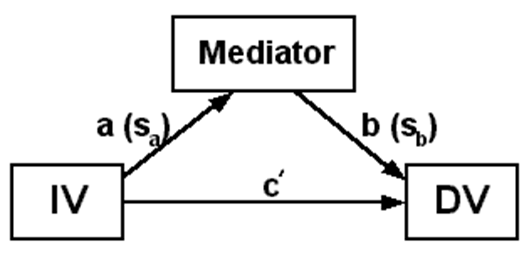

Latihan : Berikut disajikan konseptual diagram jalur / diagram path
    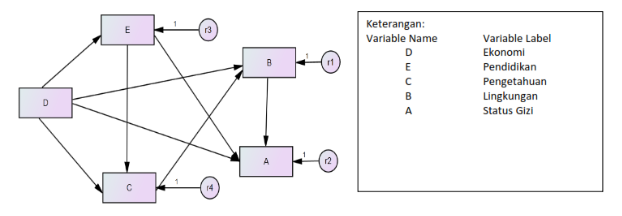

Kerjakan di R dan berikan interpretasi pembahasan, data dapat di download pada link 

https://drive.google.com/file/d/1dwSZiBNVLJq2wjVvwkPD1z7nYgqzUBxY/view?usp=sharing